In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import psutil
from IPython.core.display import display, HTML
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

# Getting started

Below you can see a basic data loader from the sample data file. Copy this notebook and start analyzing! Not sure where to start with Jupyter and Pandas? Ben Welsh's [First Python Notebook](http://www.firstpythonnotebook.org/) is a great introduction.

In [27]:
df = pd.read_csv('data/hacknight_ticket_sample_data_2015.csv', low_memory=False, parse_dates=['issue_date', 'ticket_queue_date'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
ticket_number            50000 non-null int64
issue_date               50000 non-null datetime64[ns]
violation_location       50000 non-null object
license_plate_number     50000 non-null object
license_plate_state      49998 non-null object
license_plate_type       49383 non-null object
zipcode                  41550 non-null object
violation_code           50000 non-null object
violation_description    50000 non-null object
unit                     50000 non-null int64
unit_description         50000 non-null object
vehicle_make             50000 non-null object
fine_level1_amount       50000 non-null int64
fine_level2_amount       50000 non-null int64
current_amount_due       50000 non-null float64
total_payments           50000 non-null float64
ticket_queue             50000 non-null object
ticket_queue_date        50000 non-null datetime64[ns]
notice_level             36707 

In [4]:
df.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
0,9188814621,2015-05-07 13:52:00,2134 S ARCHER AV,7c189a16ef79db9413c1f46b7e5d1712e5c0c1575be352...,MI,PAS,48103,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,...,100,0.0,50.0,Paid,2015-05-13 00:00:00,NaN,NaN,0,798,"2100 s archer av, chicago, il"
1,65543631,2015-01-10 17:09:00,423 N LARAMIE,13d93046fb2c3bc2d79baa8647d620d0c5a65fdc223cb9...,IL,PAS,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,15,...,120,146.4,0.0,Notice,2015-01-28 00:00:00,SEIZ,NaN,5109291290,16391,"400 n laramie, chicago, il"
2,9188975267,2015-06-11 18:49:00,1338 W CORNELIA,265ee87ad9d24c7732f65383e6b9af1f344348bf639ce2...,IL,PAS,606134985,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,502,...,120,0.0,60.0,Paid,2015-06-23 00:00:00,VIOL,NaN,5190301770,1444,"1300 w cornelia, chicago, il"
3,64465302,2015-01-14 08:09:00,229 W CERMAK RD,2800f6eaba1dc6fde0b0785df17c808dba871d1570cc4c...,IL,PAS,605442187,0964130A,PARK ALLEY,495,...,300,0.0,150.0,Paid,2015-04-28 00:00:00,DETR,NaN,5191229940,313,"200 w cermak rd, chicago, il"
4,9189537354,2015-10-28 16:26:00,2410 N MONTICELLO AV,f0858c838c8cabda4e8fd3e0425a6c330a76e006f9de01...,IL,PAS,60625,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,...,100,0.0,100.0,Paid,2016-01-27 00:00:00,SEIZ,NaN,5168404170,1407,"2400 n monticello av, chicago, il"


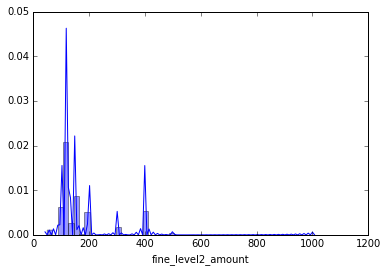

In [33]:
sns.distplot(df['fine_level2_amount'])

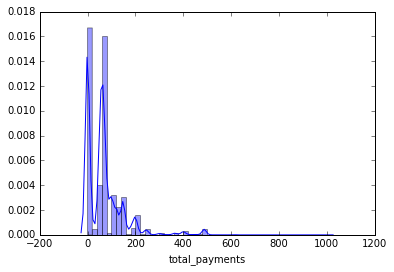

In [34]:
sns.distplot(df['total_payments'])

In [22]:
officer = df['officer'].value_counts()
officer


728      429
716      404
638      331
765      326
723      325
737      314
1385     296
790      282
690      281
800      279
1444     274
287      271
714      262
772      261
761      260
1374     256
641      256
735      256
746      253
102      250
776      231
1529     231
1491     228
789      223
1462     220
187      219
657      219
1457     217
754      214
797      214
        ... 
3373       1
5047       1
17929      1
13827      1
14337      1
17336      1
16782      1
16584      1
4113       1
6186       1
57442      1
12012      1
7227       1
4871       1
10189      1
15618      1
10480      1
18628      1
6595       1
T199       1
01002      1
18973      1
10257      1
19290      1
12804      1
2725       1
7527       1
12447      1
9886       1
18601      1
Name: officer, Length: 5779, dtype: int64

In [19]:
notice_lvl = df['notice_level'].unique()
notice_lvl

array([nan, 'SEIZ', 'VIOL', 'DETR', 'FINL', 'DLS'], dtype=object)

In [14]:
viol_code = df['violation_code'].unique()
viol_code

array(['0964190A', '0976160F', '0964130A', '0964100A', '0964125B',
       '0976160A', '0964090E', '0964040B', '0964150B', '0964190B',
       '0980130B', '0964080B', '0964050J', '0964020A', '0964100D',
       '0964170A', '0964110E', '0964100G', '0964100C', '0964110D',
       '0964080A', '0912060', '0976160D', '0964041', '0980110B',
       '0976140B', '0976150B', '0980110A', '0976210A', '0964140B',
       '0976050B', '0964120A', '0980080A', '0964070', '0964060',
       '0964020B', '0976050D', '0964110A', '0964100B', '0976050C',
       '0964170D', '0940060', '0976210B', '0964110G', '0964160B',
       '0964030B', '0976120', '0964110C', '0964130', '0976050E',
       '0976180B', '0980120B', '0976180A', '0964125D', '0940080',
       '0964125C', '0964100F', '0964120B', '0940220', '0964041B',
       '0964170B', '0964130B', '0964210', '0964091', '0964110F',
       '0964110B', '0976140A', '0964200B', '0976040A', '0940170',
       '0980120A', '0964110H', '0976160B', '0976090C', '0976160C',
       

In [10]:
viols = df['violation_description'].unique()
viols

array(['EXP. METER NON-CENTRAL BUSINESS DISTRICT',
       'EXPIRED PLATES OR TEMPORARY REGISTRATION', 'PARK ALLEY',
       "WITHIN 15' OF FIRE HYDRANT",
       'NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.',
       'REAR AND FRONT PLATE REQUIRED', 'RESIDENTIAL PERMIT PARKING',
       'STREET CLEANING', 'PARKING/STANDING PROHIBITED ANYTIME',
       'EXPIRED METER CENTRAL BUSINESS DISTRICT',
       'PARK IN CITY LOT WHEN CLOSED',
       'NO STANDING/PARKING TIME RESTRICTED', 'DISABLED PARKING ZONE',
       "WRONG DIRECTION OR 12'' FROM CURB", 'DISABLED CURB CUT',
       'TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET',
       'PARK OR STAND ON PARKWAY', 'STOP SIGN OR TRAFFIC SIGNAL',
       'BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE', 'PARK OR STAND ON SIDEWALK',
       'RUSH HOUR PARKING', 'STAND, PARK, OR OTHER USE OF BUS LANE',
       'NONCOMPLIANT PLATE(S)', 'SPECIAL EVENTS RESTRICTION',
       'HAZARDOUS DILAPIDATED VEHICLE',
       'EXCESS FUMES/SMOKE DURING OPERATION',
       'BURGLAR 

In [11]:
len(viols)

88